In [138]:
'''1) Load iris datasets from iris-data-clean.csv
   Replace the values in the columns 'Class' as follows:
     "Setosa" = 0
     "Virginica" = 1
     "Versicolor" = 2
2) Using Logistic Regression, classify the outcome (Column : 'Class') based on the labels (Columns :'sepal length /cm', 'sepal width /cm', 'petal length /cm', 'petal width /cm')
    a) Provide some values to predict the outcome
    b) Validate the model - print the confusion matrix and the accuracy score
3) Redo the above steps with any two **features
    a) Compare the accuracy score with the model built in the above with four features'''

'1) Load iris datasets from iris-data-clean.csv\n   Replace the values in the columns \'Class\' as follows:\n     "Setosa" = 0\n     "Virginica" = 1\n     "Versicolor" = 2\n2) Using Logistic Regression, classify the outcome (Column : \'Class\') based on the labels (Columns :\'sepal length /cm\', \'sepal width /cm\', \'petal length /cm\', \'petal width /cm\')\n    a) Provide some values to predict the outcome\n    b) Validate the model - print the confusion matrix and the accuracy score\n3) Redo the above steps with any two **features\n    a) Compare the accuracy score with the model built in the above with four features'

In [139]:
import numpy as np
import pandas as pd

In [140]:
df = pd.read_csv('iris-data-clean.csv')

In [141]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [142]:
df.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
140,6.7,3.0,5.2,2.3,Virginica
141,6.3,2.5,5.0,1.9,Virginica
142,6.5,3.0,5.2,2.0,Virginica
143,6.2,3.4,5.4,2.3,Virginica
144,5.9,3.0,5.1,1.8,Virginica


In [143]:
df.describe().round()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,145.0,145.0,145.0,145.0
mean,6.0,3.0,4.0,1.0
std,1.0,0.0,2.0,1.0
min,4.0,2.0,1.0,0.0
25%,5.0,3.0,2.0,0.0
50%,6.0,3.0,4.0,1.0
75%,6.0,3.0,5.0,2.0
max,8.0,4.0,7.0,2.0


In [144]:
df['class']=df['class'].map({
     "Setosa":0,
     "Virginica":1,
     "Versicolor":2
})

In [145]:
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


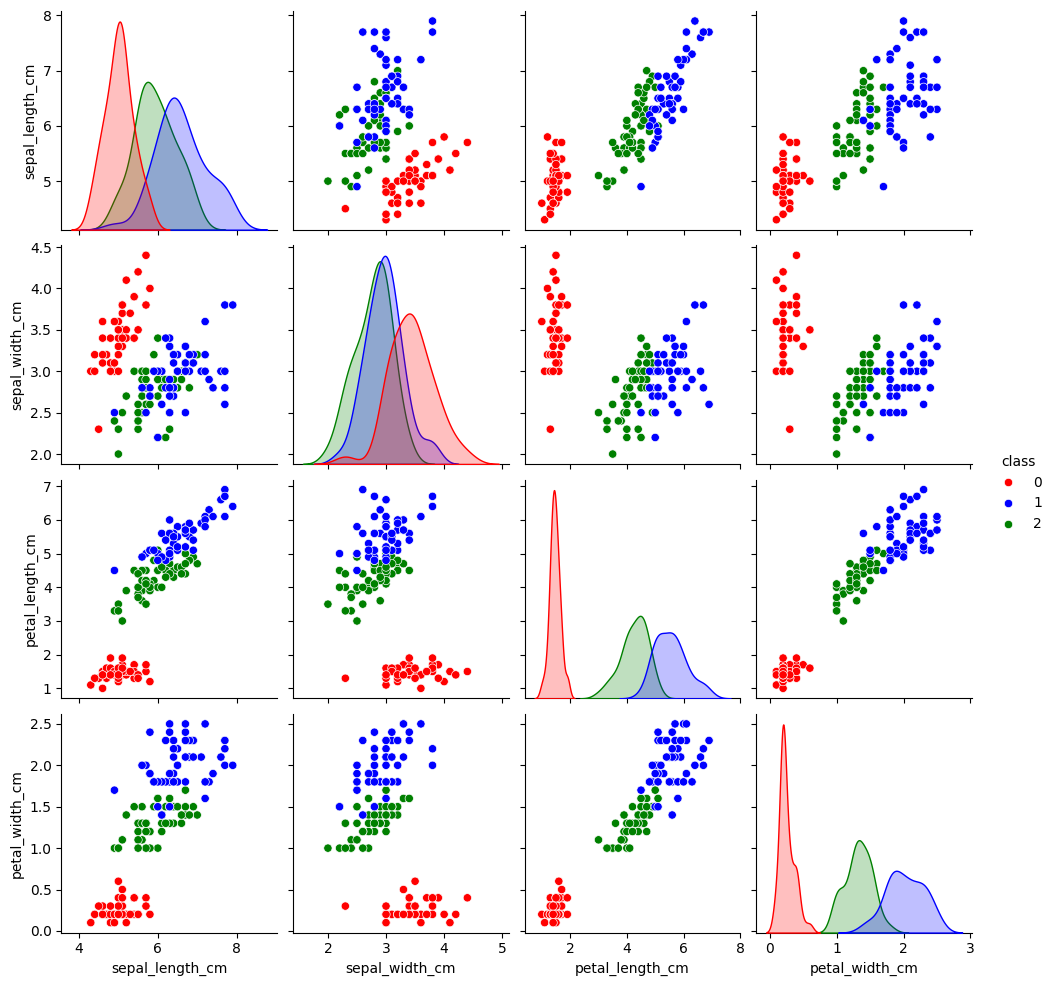

                 sepal_length_cm  sepal_width_cm  petal_length_cm  \
sepal_length_cm         1.000000       -0.106975         0.867388   
sepal_width_cm         -0.106975        1.000000        -0.421280   
petal_length_cm         0.867388       -0.421280         1.000000   
petal_width_cm          0.810592       -0.356129         0.960654   

                 petal_width_cm  
sepal_length_cm        0.810592  
sepal_width_cm        -0.356129  
petal_length_cm        0.960654  
petal_width_cm         1.000000  


In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,hue='class',palette=['red','blue','green'])
plt.show()
correlation = df.drop('class',axis=1).corr()
print(correlation)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,RepeatedStratifiedKFold

logReg = LogisticRegression()
x = df.drop('class',axis=1)
y = df['class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(116, 4)

In [148]:
y_test

69     2
140    1
27     0
19     0
42     0
117    1
126    1
108    1
84     2
18     0
12     0
55     2
128    1
78     2
73     2
36     0
112    1
133    1
100    1
101    1
94     2
136    1
11     0
66     2
31     0
45     2
51     2
76     2
111    1
Name: class, dtype: int64

In [150]:
logReg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [151]:
from sklearn.metrics import accuracy_score
y_pred=logReg.predict(x_test)
y_pred

array([2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1,
       0, 2, 0, 2, 2, 2, 1])

In [152]:
sample = np.array([[5.2, 3.5, 1.5, 0.2]])
prediction = logReg.predict(sample)
print("Predicted class (0-setosa,1-virginica,2-versicolor):", prediction)

Predicted class (0-setosa,1-virginica,2-versicolor): [0]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [153]:
acc4 = accuracy_score(y_test,y_pred)
print(acc4)

0.9310344827586207


In [154]:
from sklearn.metrics import confusion_matrix,classification_report
print(y_test)
print('y_pred: ',y_pred)

print('Default: ')
print(confusion_matrix(y_test,y_pred))


69     2
140    1
27     0
19     0
42     0
117    1
126    1
108    1
84     2
18     0
12     0
55     2
128    1
78     2
73     2
36     0
112    1
133    1
100    1
101    1
94     2
136    1
11     0
66     2
31     0
45     2
51     2
76     2
111    1
Name: class, dtype: int64
y_pred:  [2 1 0 0 0 1 1 1 2 0 0 2 1 1 2 0 1 1 1 2 2 1 0 2 0 2 2 2 1]
Default: 
[[ 8  0  0]
 [ 0 10  1]
 [ 0  1  9]]


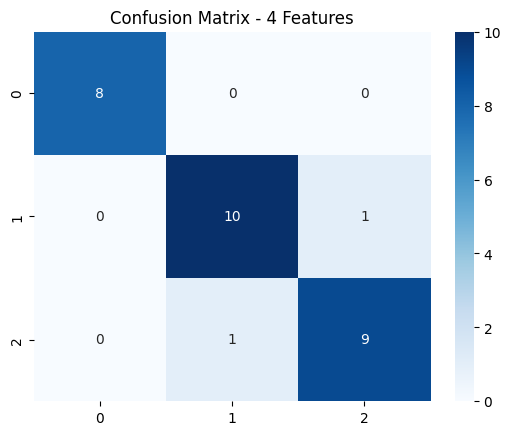

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.94        29
weighted avg       0.93      0.93      0.93        29



In [155]:
cm4 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm4, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - 4 Features")
plt.show()
print(classification_report(y_test, y_pred))

In [156]:
X2 = df[['petal_length_cm', 'petal_width_cm']]
y = df['class']

x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)
logReg1=LogisticRegression()
logReg1.fit(x_train2,y_train2)

y_pred2 = logReg1.predict(x_test2)
y_pred2


array([2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2, 2, 1,
       0, 2, 0, 2, 2, 2, 1])

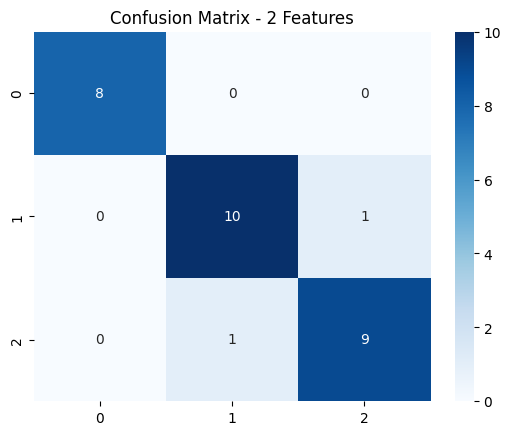

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        29
   macro avg       0.94      0.94      0.94        29
weighted avg       0.93      0.93      0.93        29



In [157]:
cm2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(cm2, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix - 2 Features")
plt.show()
print(classification_report(y_test2, y_pred2))

In [158]:
sample1 = np.array([[1.5, 0.2]])
test = logReg1.predict(sample1)
print(test)

[0]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [159]:
acc2 = accuracy_score(y_test2,y_pred2)
print(acc2)

0.9310344827586207


In [160]:

if acc4 > acc2:
    print("✔ The model with 4 features performs better.")
else:
    print("✔ The model with 2 features performs similarly or better.")

✔ The model with 2 features performs similarly or better.
